In [1]:
import json
with open('schulen.json') as f:
    schulen = json.load(f)

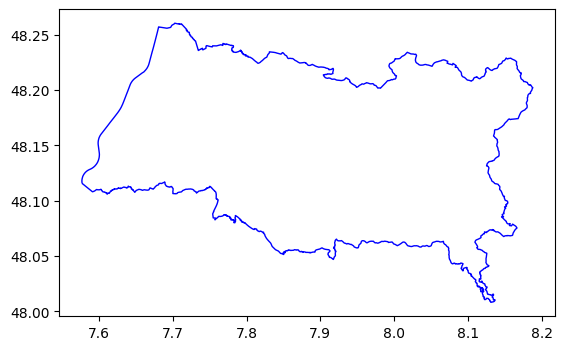

In [2]:
# Read landuse
# ============
from pyrosm import OSM
import pyrosm
from pyrosm import get_data

lk_osm=pyrosm.OSM(filepath="pbf/freiburg-regbez-latest.osm.pbf")
#fp = get_data("freiburg_regbez",directory='pbf/')
# Initialize the OSM parser object
#osm = OSM(fp)
#bh_bound=lk_osm.get_boundaries(name='Landkreis Breisgau-Hochschwarzwald')
bh_bound=lk_osm.get_boundaries(name='Landkreis Emmendingen')
place='lk_em'
#tags = {'boundary': 'administrative'}   
lk_bh=bh_bound
lk_bh_poly=bh_bound.geometry[0]
lk_bh.plot(facecolor="none", edgecolor="blue")
lk_osm=""


In [3]:
import pyrosm
# Ebene Gemeinde
gem_in_bh_gdf_osm=pyrosm.OSM(filepath="pbf/freiburg-regbez-latest.osm.pbf",bounding_box=lk_bh_poly)
gem_in_bh_gdf_of=gem_in_bh_gdf_osm.get_boundaries()
#Filter notwendig, da einige Grenzen außerhalb enthalten waren
in_bh=gem_in_bh_gdf_of.within(lk_bh_poly)

In [7]:
gem_in_bh_gdf=gem_in_bh_gdf_of[ in_bh &  (gem_in_bh_gdf_of['admin_level']=='8') ]  


<Axes: >

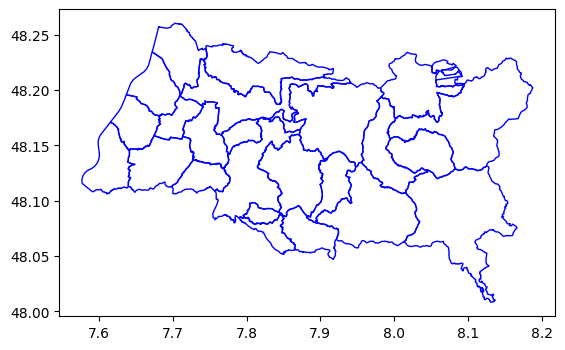

In [8]:
gem_in_bh_gdf.plot(facecolor="none",edgecolor="blue")
#lk_bh.plot()

In [9]:
gem_in_bh_gdf

,name,ref,website,admin_level,boundary,postal_code,border_type,start_date,id,timestamp,version,changeset,geometry,tags,osm_type
24,Simonswald,None,None,8,administrative,None,None,None,19339762,1642267175,55,0,"POLYGON ((8.01271 48.06265, 8.01272 48.06266, ...","{""de:amtlicher_gemeindeschluessel"":""08316042"",...",relation
46,Rheinau/Rhinau,None,None,8,administrative,None,None,None,1155777203,1581676231,21,0,"POLYGON ((7.68088 48.25716, 7.68198 48.25702, ...","{""de:amtlicher_gemeindeschluessel"":""08317971"",...",relation
47,Sexau,None,None,8,administrative,None,None,None,1197823709,1661008435,38,0,"POLYGON ((7.88171 48.08568, 7.88129 48.08487, ...","{""admin_centre:postal_code"":""79350"",""de:amtlic...",relation
48,Waldkirch,None,None,8,administrative,None,None,None,1198936570,1583992107,33,0,"POLYGON ((7.89383 48.08013, 7.89430 48.08007, ...","{""TMC:cid_58:tabcd_1:Class"":""Area"",""TMC:cid_58...",relation
49,Gutach im Breisgau,None,None,8,administrative,None,None,None,1200049432,1577538844,23,0,"POLYGON ((7.95581 48.13463, 7.95656 48.13434, ...","{""FIXME"":""recheck"",""TMC:cid_58:tabcd_1:Class"":...",relation
50,Elzach,None,None,8,administrative,None,None,None,1201162295,1416785873,45,0,"POLYGON ((7.99036 48.16152, 7.99082 48.16188, ...","{""FIXME"":""recheck"",""TMC:cid_58:tabcd_1:Class"":...",relation
51,Winden im Elztal,None,None,8,administrative,None,None,None,1202275159,1555020531,14,0,"POLYGON ((7.99452 48.15572, 7.99413 48.15479, ...","{""FIXME"":""recheck"",""admin_centre:postal_code"":...",relation
52,Herbolzheim,None,None,8,administrative,None,None,None,1209008757,1693275070,19,0,"POLYGON ((7.74293 48.22623, 7.74298 48.22716, ...","{""TMC:cid_58:tabcd_1:Class"":""Area"",""TMC:cid_58...",relation
53,Endingen,None,https://www.endingen.de/,8,administrative,None,None,None,1210133019,1714773227,19,0,"POLYGON ((7.63975 48.11320, 7.63994 48.11514, ...","{""admin_centre:postal_code"":""79346"",""de:amtlic...",relation
54,Rheinhausen,None,None,8,administrative,None,None,None,1211257282,1625752859,11,0,"POLYGON ((7.67213 48.23462, 7.68520 48.22858, ...","{""admin_centre:postal_code"":""79365"",""de:amtlic...",relation


In [10]:
## Findet alle Teilorte
#in_bh=gem_bh_gdf.within(eki_poly)
ort_in_bh_gdf=gem_in_bh_gdf_of[ in_bh & (gem_in_bh_gdf_of['boundary']=='administrative') &  ((gem_in_bh_gdf_of['admin_level']=='9')|(gem_in_bh_gdf_of['admin_level']=='10') ) ]  
len(ort_in_bh_gdf)
ort_in_bh_gdf

,name,ref,website,admin_level,boundary,postal_code,border_type,start_date,id,timestamp,version,changeset,geometry,tags,osm_type
18,Kiechlinsbergen,None,None,9,administrative,None,None,None,14545824,1406941536,12,0,"POLYGON ((7.63975 48.11320, 7.64008 48.11295, ...","{""type"":""boundary""}",relation
19,Leiselheim,None,None,9,administrative,None,None,None,14616062,1636054189,12,0,"POLYGON ((7.62380 48.12826, 7.62411 48.12807, ...","{""type"":""boundary"",""wikidata"":""Q107478932""}",relation
20,Jechtingen,None,None,9,administrative,None,None,None,14686301,1636054190,12,0,"POLYGON ((7.57723 48.11561, 7.57859 48.11494, ...","{""type"":""boundary"",""wikidata"":""Q107642711""}",relation
21,Wildgutach,None,None,10,administrative,None,None,None,19118778,1677123394,19,0,"POLYGON ((8.09333 48.04295, 8.09304 48.04268, ...","{""type"":""boundary"",""wikidata"":""Q25158368""}",relation
22,Obersimonswald,None,None,10,administrative,None,None,None,19192438,1621082173,15,0,"POLYGON ((8.06671 48.06327, 8.06882 48.06390, ...","{""type"":""boundary""}",relation
23,Untersimonswald,None,None,10,administrative,None,None,None,19266099,1506353075,21,0,"POLYGON ((8.01271 48.06265, 8.01422 48.06246, ...","{""type"":""boundary""}",relation
25,Altsimonswald,None,None,10,administrative,None,None,None,19413427,1642267175,16,0,"POLYGON ((8.02188 48.11654, 8.02289 48.11596, ...","{""type"":""boundary""}",relation
26,Haslachsimonswald,None,None,10,administrative,None,None,None,19487093,1361394448,8,0,"POLYGON ((8.05767 48.12017, 8.05848 48.12010, ...","{""type"":""boundary""}",relation
94,Buchholz,None,None,9,administrative,None,None,None,4118119164,1494716354,5,0,"POLYGON ((7.89383 48.08013, 7.89390 48.08033, ...","{""type"":""boundary""}",relation
95,Suggental,None,None,10,administrative,None,None,None,4120089369,1574517699,4,0,"POLYGON ((7.92192 48.06520, 7.92213 48.06494, ...","{""type"":""boundary"",""wikidata"":""Q47520113""}",relation


In [ ]:
######
#
#  Dies ist die Hauptprozedur. 
#  Hier wird über alle Orte iteriert und dabei jeweils zuerst das osm für ein Bereich eingestellt und danach
#  die Wege, Gebäude und Schulen eingetragen und ausgewertet.
#
######
import pandas as pd
import numpy
from shapely.geometry import Point
import networkx as nx
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib
import osmnx as ox
import datetime

network_type = "walk"
trip_times = [5, 10, 15, 20, 25,30,40]  # in minutes
travel_speed = 3  # walking speed in km/hour
# get one color for each isochrone
iso_colors = ox.plot.get_colors(n=len(trip_times), cmap="plasma", start=0)
cmap = matplotlib.cm.turbo
norm = matplotlib.colors.BoundaryNorm(trip_times, cmap.N)


sc=[]
for cur in (schulen["schools"]):
    p=Point(cur["lng"],cur["lat"])
    sc=sc+[[p,cur["name"]]]

alle_gem=pd.DataFrame()
for index_gem,row_gem in gem_in_bh_gdf.iterrows():
    gem_name=row_gem['name']
    print('Gem: {} - Fläche: {}'.format(gem_name,row_gem['geometry'].area))
    #if gem_name=='Vörstetten':
    if row_gem['geometry'].area > 0.0002:
    #if 1==1:
        print('Line 0036: {} - {}'.format(datetime.datetime.now(),gem_name))
        #gem_poly=row_gem['geometry'].values[0]
        # Initialisierung des Gebiets
        gem_poly=row_gem['geometry']
        #gem_osm=pyrosm.OSM(filepath="pbf/freiburg-regbez-latest.osm.pbf",bounding_box=gem_poly)
        gem_osm=pyrosm.OSM(filepath="pbf/freiburg-regbez-latest.osm.pbf",bounding_box=gem_poly)

        # Wegenetz
        # Zeit wird erst verwendet, wenn Aufruf gemacht wird. Davor ist Initialierung
        gem_walk_net_nodes, gem_walk_net_edges = gem_osm.get_network(network_type="walking",nodes=True)
        print('Line 0048: {} - {}'.format(datetime.datetime.now(),gem_name))
        # to_graph evtl. anderes Paket
        gem_walk_net = gem_osm.to_graph(gem_walk_net_nodes, gem_walk_net_edges, graph_type="networkx")
        meters_per_minute = travel_speed * 1000 / 60  # km per hour to m per minute
        for _, _, _, data in gem_walk_net.edges(data=True, keys=True):
            data["time"] = data["length"] / meters_per_minute

        print('Line 0055: {} - {}'.format(datetime.datetime.now(),gem_name))
        
        # Landuse
        tags_lu={'landuse':['residential','farmyard','industrial','commercial']}
        gem_gdf_lu=gem_osm.get_landuse(custom_filter=tags_lu)

        #tags = {'building': True}  
        #gdf_gem_build=ox.features_from_polygon(gem_poly,tags)
        tags = {'addr:housenumber': True}
        
        gdf_gem_hn=gem_osm.get_data_by_custom_criteria(custom_filter=tags)
        
        gdf_gem_hn['triptime']=120
        

        in_gem=gem_poly
        #ort_in_bh_gdf=gem_in_bh_gdf_of[ in_bh & (gem_in_bh_gdf_of['boundary']=='administrative') &  ((gem_in_bh_gdf_of['admin_level']=='9')|(gem_in_bh_gdf_of['admin_level']=='10') ) ]  
        
        # Ortsteile: 
        in_gem=gem_in_bh_gdf_of.within(gem_poly)
        #ort_in_gem_gdf=gem_in_bh_gdf_of[ in_gem & (gem_in_bh_gdf_of['boundary']=='administrative') & (gem_in_bh_gdf_of['name']=='Zähringen') & ((gem_in_bh_gdf_of['admin_level']=='9')|(gem_in_bh_gdf_of['admin_level']=='10') ) ]  
        ort_in_gem_gdf=gem_in_bh_gdf_of[ in_gem & (gem_in_bh_gdf_of['boundary']=='administrative')  & ((gem_in_bh_gdf_of['admin_level']=='9')|(gem_in_bh_gdf_of['admin_level']=='10') ) ]  

        if len(ort_in_gem_gdf)==0:
            ort_in_gem_gdf=gem_in_bh_gdf_of[gem_in_bh_gdf_of['name']==gem_name]
        
        # Aufbau Listen:     
        t=pd.DataFrame({'GemName':[gem_name]})
        x=ort_in_gem_gdf['name'].values
        if gem_name not in x:
            x=numpy.append(x,[[gem_name]])
        ort=pd.DataFrame({'OrtName': x})
        #ort=pd.DataFrame[{'Name':x[0]}]
        y=numpy.unique(gem_gdf_lu['landuse'].values)
        y=numpy.append(y,[['unbekannt']])
        #y.append('unbekannt')
        landuse_df=pd.DataFrame({'Landuse': y})
        tt=pd.DataFrame({'WegeDauer':[0]+trip_times+[120]})
        
        res=pd.merge(ort,landuse_df, how='cross')
        res2=pd.merge(t,res, how='cross')
        boxen=pd.merge(res2,tt, how='cross')
        boxen=boxen.set_index(['GemName','OrtName','Landuse','WegeDauer'])
        boxen['Anzahl']=0
            
        print('Line 0088: {} - {}'.format(datetime.datetime.now(),gem_name))
        
        node_colors = {}
        node_time = {}
        for cur in (schulen["schools"]):
            p=Point(cur["lng"],cur["lat"])
            if p.within(gem_poly): 
                poi=ox.distance.nearest_nodes(gem_walk_net, cur["lng"],cur["lat"])
                for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
                    subgraph = nx.ego_graph(gem_walk_net, poi, radius=trip_time, distance="time")
                    for node in subgraph.nodes():
                        col_old=0
                        if node in node_colors:
                            col_old=sum(node_colors[node])
                        if sum(color)>col_old:
                            node_colors[node] = color
                        col_time=10000000
                        if node in node_time:
                            col_time=node_time[node]
                        if trip_time<col_time:
                            node_time[node] = trip_time    
        print('Line 0118: {} - {}'.format(datetime.datetime.now(),gem_name))
        Ortsteil=gem_name
        for idx_ort, row_ort in ort_in_gem_gdf.iterrows():
            poly_ortt = gpd.GeoSeries(row_ort['geometry'])
            ort_poly = row_ort['geometry']
            Ortsteil=row_ort['name']
            ort_osm=pyrosm.OSM(filepath="pbf/freiburg-regbez-latest.osm.pbf",bounding_box=ort_poly)
            # Wegenetz
            # Zeit wird erst verwendet, wenn Aufruf gemacht wird. Davor ist Initialierung
            ort_walk_net_nodes, ort_walk_net_edges = ort_osm.get_network(network_type="walking",nodes=True)
            ort_walk_net = gem_osm.to_graph(ort_walk_net_nodes, ort_walk_net_edges, graph_type="networkx")
            ort_gdf_lu=ort_osm.get_landuse(custom_filter=tags_lu)
            ort_gem_hn=ort_osm.get_data_by_custom_criteria(custom_filter=tags)
            iter=0
            for idx_build, row_build in ort_gem_hn.iterrows():
                poly_build=row_build['geometry']
                p_center=poly_build.centroid
                if poly_ortt.contains(p_center).any():
                    poi=ox.distance.nearest_nodes(ort_walk_net, p_center.x,p_center.y)
                    WegeDauer=120
                    if poi in node_time:
                        WegeDauer=node_time[poi]
                        ort_gem_hn.loc[idx_build,['triptime']]=node_time[poi]
                        gdf_gem_hn.loc[gdf_gem_hn['id']==row_build['id'],['triptime']]=node_time[poi]
                    #if poi in node_time:
                    
                Landuse='unbekannt'
                for idx_landuse, row_landuse in ort_gdf_lu.iterrows():
                    lu_type=row_landuse['landuse']
                    poly_lu= gpd.GeoSeries(row_landuse['geometry'])
                    if poly_lu.contains(p_center).any():
                        Landuse=lu_type
                        break

                nn=boxen.at[(gem_name,Ortsteil,Landuse,WegeDauer),'Anzahl']+1
                if not nn > 0:
                    nn=1
                boxen.at[(gem_name,Ortsteil,Landuse,WegeDauer),'Anzahl']=nn
                if iter%100==0:
                    print('Line 0147: {} - {} - {}- {}'.format(datetime.datetime.now(),iter,gem_name, Ortsteil))

                iter+=1
            print(boxen.loc[gem_name,Ortsteil,:])

        print('Line 0151: {} - {}'.format(datetime.datetime.now(),gem_name))
    
        boxen.to_csv('erstellte_daten/'+gem_name+'.csv',index=True)
        if len(alle_gem)<5:
            alle_gem=boxen
        else:
            alle_gem=alle_gem+boxen
        alle_gem.to_csv('erstellte_daten/'+place+'.csv',index=True)

        br=1
        anz=1

        gp_b=gem_poly.bounds[2]-gem_poly.bounds[0]
        gp_l=gem_poly.bounds[3]-gem_poly.bounds[1]
        md=max(gp_b,gp_l)
        size=60/md


        print('Line 0151: {} - {}'.format(datetime.datetime.now(),gem_name))
     
        fig, axs = plt.subplots(anz,br,figsize=(int(gp_b*size), int(gp_l*size)))
        #fig, axs = plt.subplots(anz,br)
        axs.set_title(gem_name)
        gem_gdf_lu.plot(ax=axs,column='landuse', facecolor='none',legend=True)
        for idx_orte, row_orte in ort_in_gem_gdf.iterrows():
            poly_ort = gpd.GeoSeries(row_orte['geometry'])
            p_center=poly_ort.centroid
            poly_ort.plot(ax=axs,facecolor='none', edgecolor='green')
            axs.annotate(text=row_orte["name"], xy=(p_center[0].x,p_center[0].y), horizontalalignment='center')
        if len(ort_in_gem_gdf)==0:
            gem_poly_gpd = gpd.GeoSeries(gem_poly)
            gem_poly_gpd.plot(ax=axs,facecolor='none', edgecolor='blue') 
        gdf_gem_hn.plot(ax=axs,column='triptime',markersize =5, cmap=cmap,norm=norm)
        nc = [node_colors[node] if node in node_colors else "none" for node in gem_walk_net.nodes()]
        ns = [1 if node in node_colors else 0 for node in gem_walk_net.nodes()]
        #poly_ort.plot(ax=axs,facecolor='none', edgecolor='green')
        fig, ax = ox.plot_graph(
            gem_walk_net,
            ax=axs,
            node_color=nc,
            node_size=ns,
            node_alpha=0.6,
            edge_linewidth=0.1,
            edge_color="#999999",
            show=False, 
            close=False
        )
        for cur in sc:
            axs.scatter(cur[0].x,cur[0].y,color='red',s=80)    
            axs.annotate(text=cur[1], xy=(cur[0].x,cur[0].y), horizontalalignment='center')
            #axs[sw//br,sw%br].set_ylim(poly_gem.bounds["miny"][0],poly_gem.bounds["maxy"][0])
            #axs[sw//br,sw%br].set_xlim(poly_gem.bounds["minx"][0],poly_gem.bounds["maxx"][0])
        fig.savefig('images/'+gem_name+'.png')
        #plt.show()
        print('Line 0215: {} - {}'.format(datetime.datetime.now(),gem_name))


Gem: Simonswald - Fläche: 0.00896946065404336
Line 0036: 2024-09-09 16:13:44.977409 - Simonswald
Line 0048: 2024-09-09 16:14:53.514072 - Simonswald
Line 0055: 2024-09-09 16:14:55.390081 - Simonswald
Line 0088: 2024-09-09 16:14:55.940119 - Simonswald
Line 0118: 2024-09-09 16:14:56.432834 - Simonswald
Line 0147: 2024-09-09 16:15:47.833674 - 0 - Simonswald- Wildgutach
                       Anzahl
Landuse     WegeDauer        
commercial  0               0
            5               0
            10              0
            15              0
            20              0
            25              0
            30              0
            40              0
            120             0
farmyard    0               0
            5               0
            10              0
            15              0
            20              0
            25              0
            30              0
            40              0
            120             7
industrial  0               0
  

C:\Users\tstrub\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyrosm\graphs.py:155: UserWarning: Column 'oneway' missing in the edges GeoDataFrame. Assuming all edges to be bidirectional (travel allowed to both directions).
  nodes, edges = get_directed_edges(


Line 0147: 2024-09-09 17:07:05.100191 - 0 - Endingen- Kiechlinsbergen
Line 0147: 2024-09-09 17:07:10.001802 - 100 - Endingen- Kiechlinsbergen
Line 0147: 2024-09-09 17:07:15.088847 - 200 - Endingen- Kiechlinsbergen
Line 0147: 2024-09-09 17:07:19.956300 - 300 - Endingen- Kiechlinsbergen
                       Anzahl
Landuse     WegeDauer        
commercial  0               0
            5               0
            10              0
            15              0
            20              0
            25              0
            30              0
            40              0
            120             0
farmyard    0               0
            5               0
            10              0
            15              0
            20              0
            25              0
            30              0
            40              0
            120             0
industrial  0               0
            5               0
            10              0
            15          

C:\Users\tstrub\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyrosm\graphs.py:155: UserWarning: Column 'oneway' missing in the edges GeoDataFrame. Assuming all edges to be bidirectional (travel allowed to both directions).
  nodes, edges = get_directed_edges(


Line 0147: 2024-09-09 17:48:37.019782 - 0 - Teningen- Landeck
                       Anzahl
Landuse     WegeDauer        
commercial  0               0
            5               0
            10              0
            15              0
            20              0
            25              0
            30              0
            40              0
            120             0
farmyard    0               0
            5               0
            10              0
            15              0
            20              0
            25              0
            30              0
            40              0
            120             0
industrial  0               0
            5               0
            10              0
            15              0
            20              0
            25              0
            30              0
            40              0
            120             0
residential 0               0
            5               0
        

In [29]:
#boxen[(gem_name,Ortsteil)]
print(boxen.loc[gem_name,Ortsteil,:])
#type(boxen)

                       Anzahl
Landuse     WegeDauer        
commercial  0               0
            5               2
            10             89
            15            201
            20            204
            25            154
            30             65
            40             91
            120            21
farmyard    0               0
            5               0
            10              1
            15              0
            20             14
            25             17
            30             23
            40              9
            120            27
industrial  0               0
            5               6
            10             30
            15             86
            20             69
            25             61
            30             36
            40            124
            120            88
residential 0               0
            5            1846
            10           6571
            15           7306
          

<Axes: title={'center': 'Freiburg im Breisgau'}>

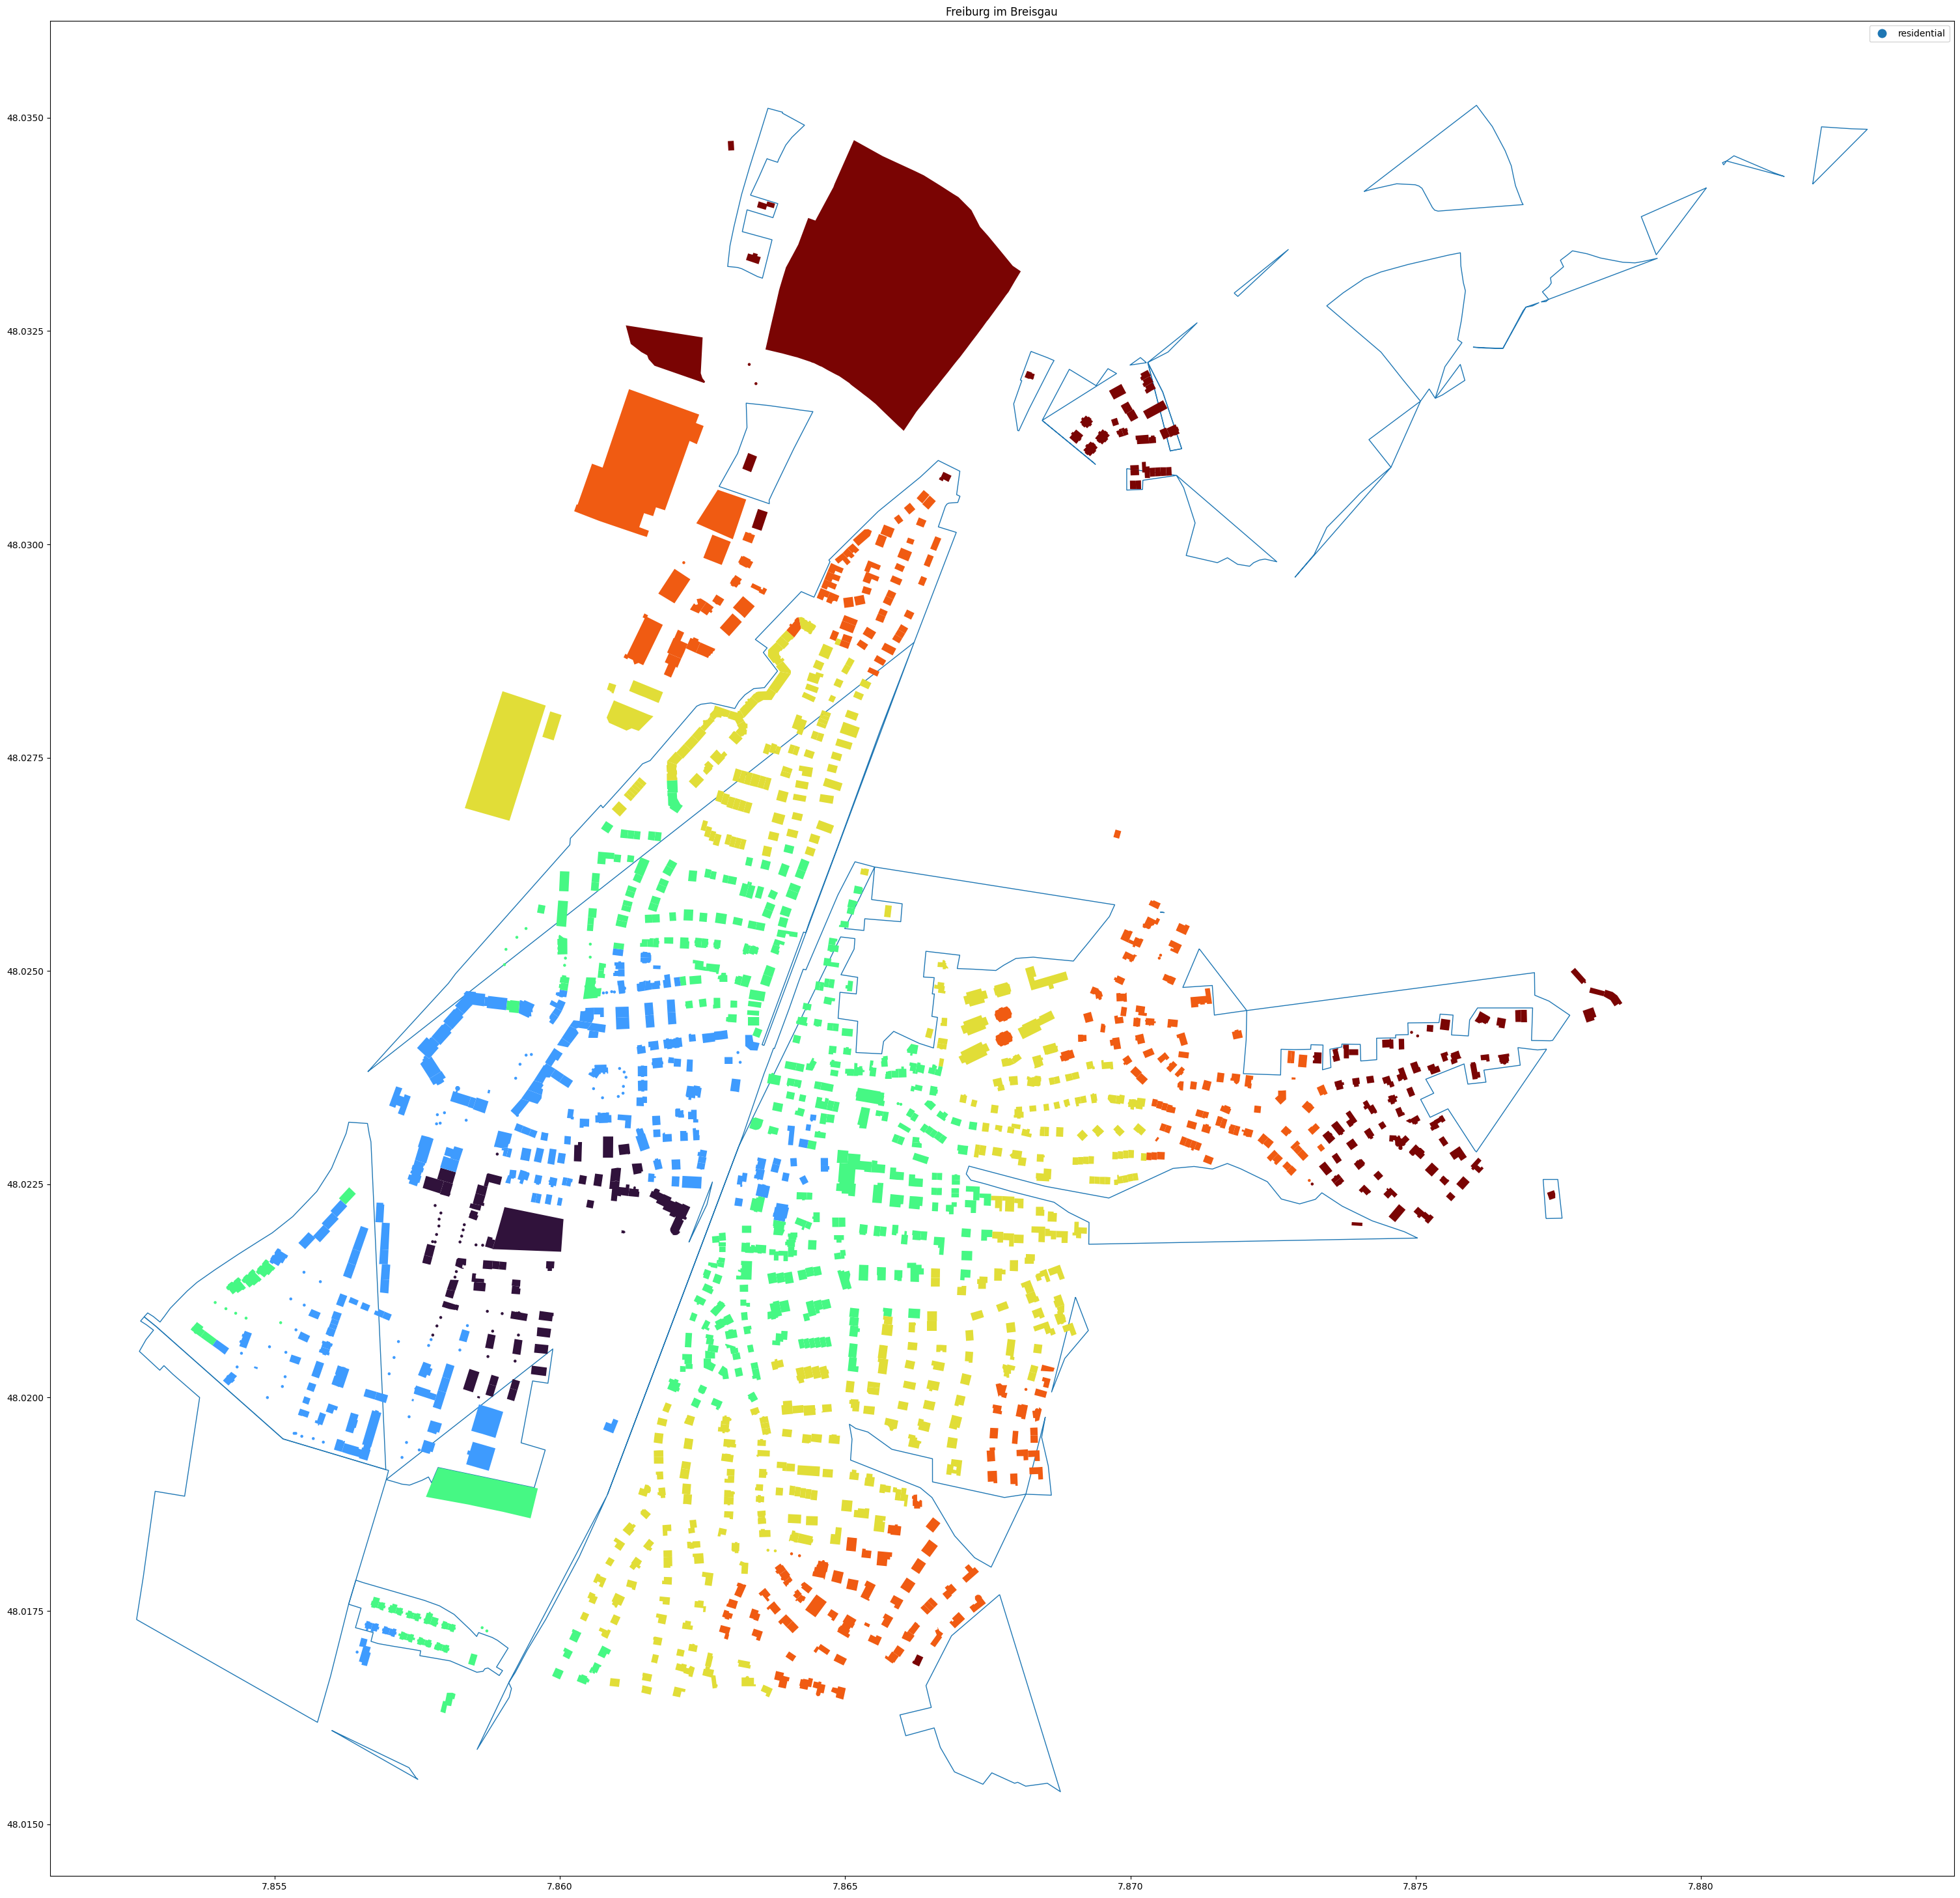

In [40]:
#hn_colors_series = pd.DataFrame.from_dict(hn_colors,orient='index')
#hn_colors_series
#tags_lu={'landuse':['residential','farmyard','industrial','commercial']}
tags_lu={'landuse':['residential']}
ort_gdf_lu=ort_osm.get_landuse(custom_filter=tags_lu)

fig, axs = plt.subplots(anz,br,figsize=(int(gp_b*size), int(gp_l*size)))
#fig, axs = plt.subplots(anz,br)
axs.set_title(gem_name)
ort_gdf_lu.plot(ax=axs,column='landuse', facecolor='none',legend=True)
ort_gem_hn.plot(ax=axs,column='triptime',markersize =5, cmap=cmap,norm=norm)

(<Figure size 800x800 with 1 Axes>, <Axes: >)

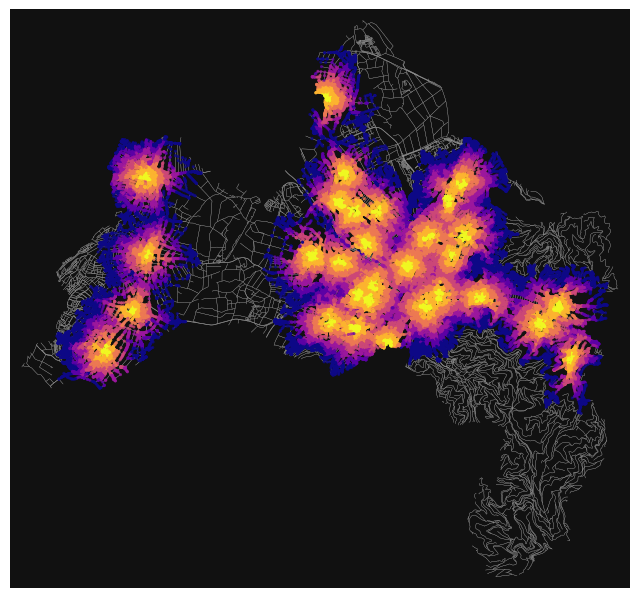

In [19]:
#gdf_gem_hn.plot(column='triptime',markersize =5, cmap=cmap,norm=norm)
nc = [node_colors[node] if node in node_colors else "none" for node in gem_walk_net.nodes()]
ns = [1 if node in node_colors else 0 for node in gem_walk_net.nodes()]
ox.plot_graph(
            gem_walk_net,
            node_color=nc,
            node_size=ns,
            node_alpha=0.8,
            edge_linewidth=0.2,
            edge_color="#999999",
            show=False, 
            close=False
        )

In [29]:
#ort_in_gem_gdf
gem_in_bh_gdf_of[gem_in_bh_gdf_of['name']==gem_name]
#md={'name':'gem_name','boundary':,'geometry':}

,name,ref,website,admin_level,boundary,postal_code,border_type,start_date,id,timestamp,version,changeset,geometry,tags,osm_type
93,Vörstetten,None,None,8,administrative,None,None,None,4116148965,1578166383,19,0,"POLYGON ((7.78981 48.08419, 7.79014 48.08395, ...","{""admin_centre:postal_code"":""79279"",""de:amtlic...",relation


In [27]:
gem_in_bh_gdf

,name,ref,website,admin_level,boundary,postal_code,border_type,start_date,id,timestamp,version,changeset,geometry,tags,osm_type
24,Simonswald,None,None,8,administrative,None,None,None,19339762,1642267175,55,0,"POLYGON ((8.01271 48.06265, 8.01272 48.06266, ...","{""de:amtlicher_gemeindeschluessel"":""08316042"",...",relation
46,Rheinau/Rhinau,None,None,8,administrative,None,None,None,1155777203,1581676231,21,0,"POLYGON ((7.68088 48.25716, 7.68198 48.25702, ...","{""de:amtlicher_gemeindeschluessel"":""08317971"",...",relation
47,Sexau,None,None,8,administrative,None,None,None,1197823709,1661008435,38,0,"POLYGON ((7.88171 48.08568, 7.88129 48.08487, ...","{""admin_centre:postal_code"":""79350"",""de:amtlic...",relation
48,Waldkirch,None,None,8,administrative,None,None,None,1198936570,1583992107,33,0,"POLYGON ((7.89383 48.08013, 7.89430 48.08007, ...","{""TMC:cid_58:tabcd_1:Class"":""Area"",""TMC:cid_58...",relation
49,Gutach im Breisgau,None,None,8,administrative,None,None,None,1200049432,1577538844,23,0,"POLYGON ((7.95581 48.13463, 7.95656 48.13434, ...","{""FIXME"":""recheck"",""TMC:cid_58:tabcd_1:Class"":...",relation
50,Elzach,None,None,8,administrative,None,None,None,1201162295,1416785873,45,0,"POLYGON ((7.99036 48.16152, 7.99082 48.16188, ...","{""FIXME"":""recheck"",""TMC:cid_58:tabcd_1:Class"":...",relation
51,Winden im Elztal,None,None,8,administrative,None,None,None,1202275159,1555020531,14,0,"POLYGON ((7.99452 48.15572, 7.99413 48.15479, ...","{""FIXME"":""recheck"",""admin_centre:postal_code"":...",relation
52,Herbolzheim,None,None,8,administrative,None,None,None,1209008757,1693275070,19,0,"POLYGON ((7.74293 48.22623, 7.74298 48.22716, ...","{""TMC:cid_58:tabcd_1:Class"":""Area"",""TMC:cid_58...",relation
53,Endingen,None,https://www.endingen.de/,8,administrative,None,None,None,1210133019,1714773227,19,0,"POLYGON ((7.63975 48.11320, 7.63994 48.11514, ...","{""admin_centre:postal_code"":""79346"",""de:amtlic...",relation
54,Rheinhausen,None,None,8,administrative,None,None,None,1211257282,1625752859,11,0,"POLYGON ((7.67213 48.23462, 7.68520 48.22858, ...","{""admin_centre:postal_code"":""79365"",""de:amtlic...",relation


In [32]:
fig.savefig('images/'+gem_name+'.png')